# 1. Підключення та оптимізації таблиці.
### Підключимо таблицю та оглянемо її перші 15 записів.
В налаштуваннях виведення таблиці через set_options вкажимо вивід всіх колонок таблиці.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split

df = pd.read_csv('imports-85.data', header=0)
# Display up to all columns of a dataframe.
pd.set_option('display.max_columns', df.shape[1])
plt.rcParams['font.size'] = 24

df.head(n=15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Розмір всієї таблиці складає: 26 стовпчиків та 205 записів.

In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Типи даних.
Всі поля таблиці заповненні, тобто кожен стовпчик має 205 записів. Бачимо, що такі ознаки таблиці як: "normalized-losses", "bore", "stroke", "horsepower", "peak-rpm" та "price", мають тип object, хоча в описі вони зазначені як числові.

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Числові типи даних при подібному діапазоні можуть бути опитимізовані з 64-бітових записів у 32-ухбітові.

In [6]:
df_int = df.select_dtypes(include='int').columns

for col in df_int:
    df[col] = df[col].astype('int16')

df_float = df.select_dtypes(include='float').columns

for col in df_float:
    df[col] = df[col].astype('float32')

### Поглянемо скільки відсутніх елементів містить кожна ознака таблиці.
Ознаки, які були визначені відразу як числові, не можуть мати в своїй структурі записи: "?", тому ми їх не будемо перевіряти.

In [7]:
print('Column\tMissing values\t% of total values\n' + '=' * 20)
for col in df.select_dtypes(include='object').columns:
    nan_count = df[col].loc[df[col] == '?'].count()
    if nan_count == 0:
        print('{}: {}'.format(col, nan_count))
    else:
        persent = 100 * nan_count / len(df)
        print('{}: {} ({:.2f}%)'.format(col, nan_count, persent))

Column	Missing values	% of total values
normalized-losses: 41 (20.00%)
make: 0
fuel-type: 0
aspiration: 0
num-of-doors: 2 (0.98%)
body-style: 0
drive-wheels: 0
engine-location: 0
engine-type: 0
num-of-cylinders: 0
fuel-system: 0
bore: 4 (1.95%)
stroke: 4 (1.95%)
horsepower: 2 (0.98%)
peak-rpm: 2 (0.98%)
price: 4 (1.95%)


### Найбільше відсутніх даних у стовпчику "normalized-losses" - 41, що складає 20%.
Оскільки ця ознака одна з визначальних всієї таблиці та має значний відсоток відсутніх даних, то, для того, щоб перевести стовпчик у цілочисельний тип, вісутнім записам надамо значення "-1".

In [8]:
df['normalized-losses'] = df['normalized-losses'].replace('?', '-1').astype('int16')

### Решті ознак, які за значеннями мають бути числовими, відсутнім даним надамо середні, по їх стовпчику, записи.
В описі таблиці такі ознаки як "bore", "stroke" містять дійсні числа.

In [9]:
obj_to_float_columns = ['bore', 'stroke']

for col in obj_to_float_columns:
    not_nan_row = df[col].loc[df[col] != '?']
    col_mean = not_nan_row.astype('float32').mean()
    df[col] = df[col].replace('?', col_mean).astype('float32')

А от такі ознаки "horsepower", "peak-rpm" та "price" містять вже цілі числа.

Так як, в описі таблиці зазначено, що максимальна ціна автомобіля становить 45400 одиниць, то тип даних "int16" нам вже не підійде.

In [10]:
obj_to_int_columns = ['horsepower', 'peak-rpm', 'price']

for col in obj_to_int_columns:
    not_nan_row = df[col].loc[df[col] != '?']
    col_mean = not_nan_row.astype('int32').mean()
    df[col] = df[col].replace('?', col_mean).astype('int32')

### На завершення оптимізації переведемо решту ознак з типом object в тип category.

In [11]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    df[col] = df[col].astype('category')

In [12]:
len(object_columns)

10

### Якщо ми ще раз подивимось на інформацію про нашу таблицю, то побачимо, що тип object був оптимізований до числового або категоріального типу запису.

Всього в таблиці тепер міститься 10 з 26 категоріальних ознак.
Використання пам'яті з 211,9 Кбайт вийшло скоротити до 18,3 Кбайт, тобто на 91,4%.

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int16
normalized-losses    205 non-null int16
make                 205 non-null category
fuel-type            205 non-null category
aspiration           205 non-null category
num-of-doors         205 non-null category
body-style           205 non-null category
drive-wheels         205 non-null category
engine-location      205 non-null category
wheel-base           205 non-null float32
length               205 non-null float32
width                205 non-null float32
height               205 non-null float32
curb-weight          205 non-null int16
engine-type          205 non-null category
num-of-cylinders     205 non-null category
engine-size          205 non-null int16
fuel-system          205 non-null category
bore                 205 non-null float32
stroke               205 non-null float32
compression-ratio    205 non-null float32
horsepower 

# 2. Кореляція

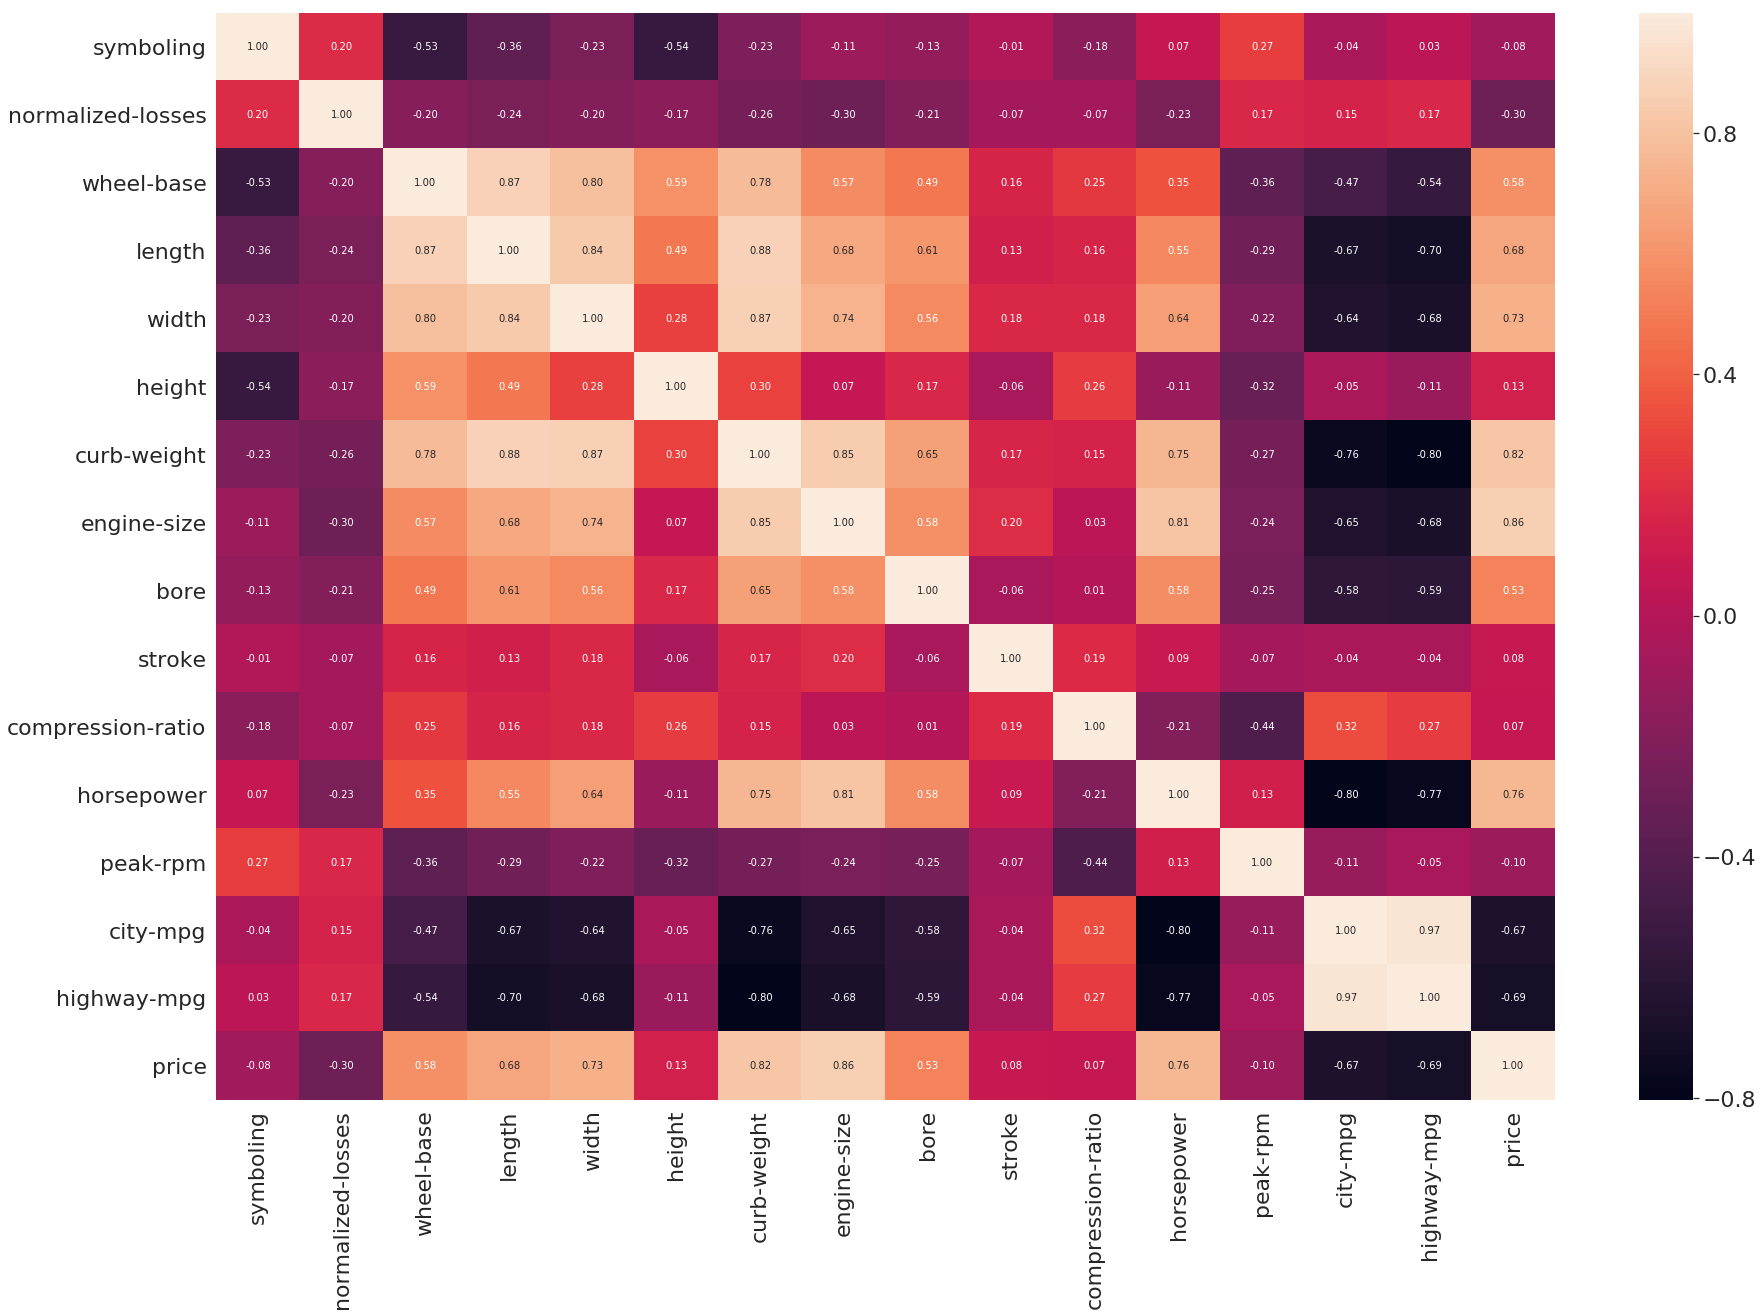

In [14]:
plt.figure(figsize=(30,20))
a = sns.heatmap(df.corr(), annot=True, fmt='.2f')

### З таблиці кореляції ми можемо знайти такі колінеарні властивості:
* Атрибути розмірів авто, такі як wheel-base, length, width та спорядженої маси curb-weight мають коофіціент кореляції від 0.78 до 0.88;
* Атрибут спорядженої маси curb-weight та розмір двигуна авто engine-size, мають високий ступінь кореляції - 0.85;
* Атрибути швидкості city-mpg та highway-mpg є колінеарними з параметром потужності horsepower та спорядженої маси curb-weight - від 0.76 і вище;
* Ціна на автомобіль є колінеарною до curb-weight та engine-size.

### Висновки з таблиці:
Оцінивши коофіціенти кореляції, бачимо, що залишивши ознаку curb-weight, ми можем знехтувати більшістю полів габаритів авто (wheel-base, lenght, width), потужності (engine-size, horsepower), швидкості (city-mpg, highwaw-mpg) та ціни (price), як такими, що мають ступінь кореляції вище 0.75.

### Щоб переконатись у їх високій кореляції, зобразимо це у графіку.

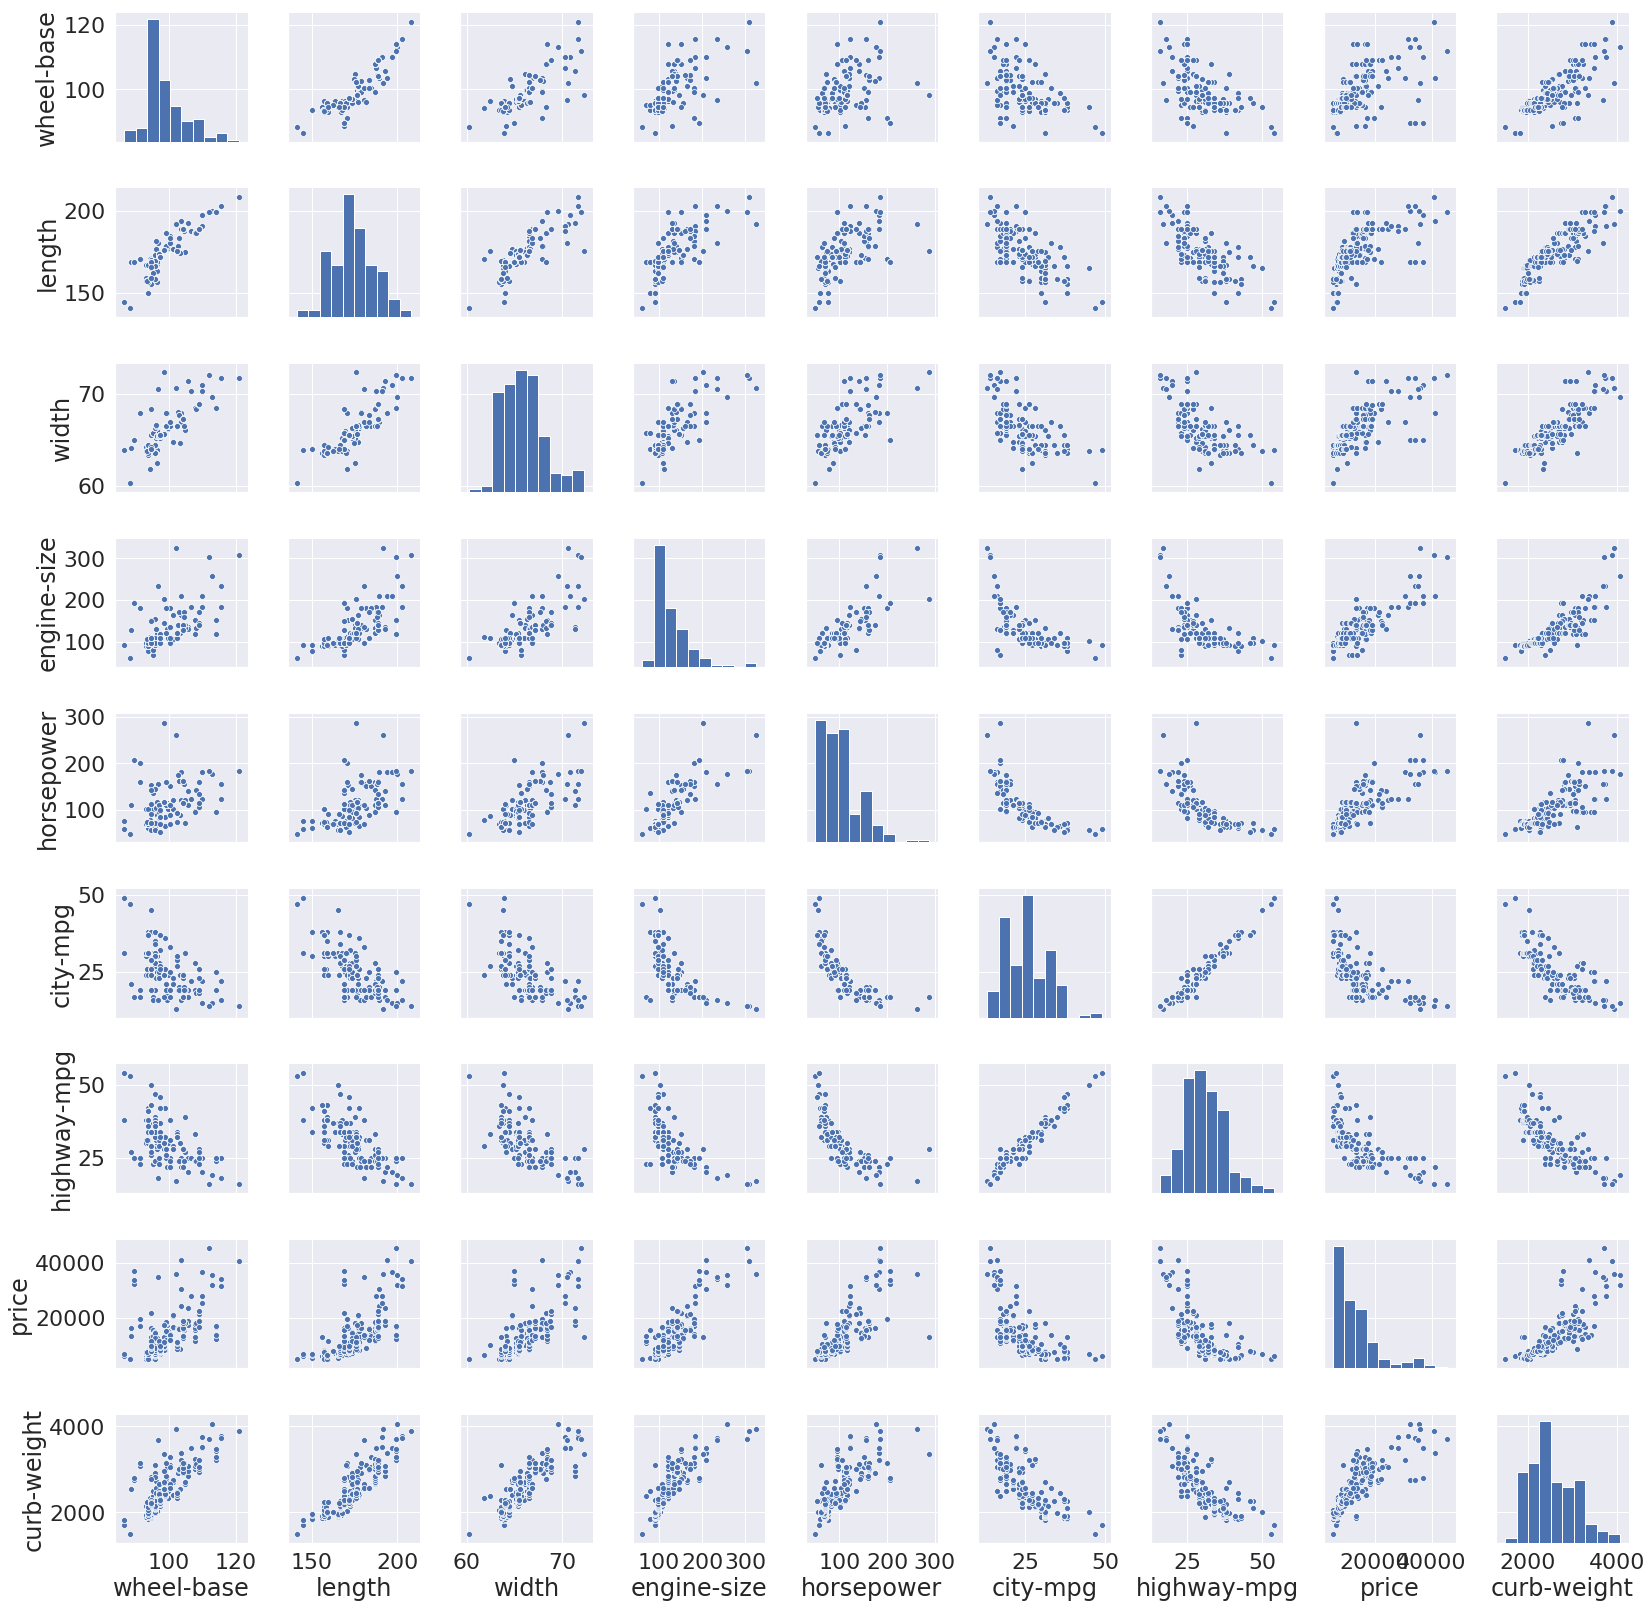

In [15]:
corr_columns = ['wheel-base', 'length', 'width', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price', 'curb-weight']

sns.pairplot(df[corr_columns])

In [16]:
df_copy = df.copy()

df = df.drop(columns=corr_columns[:-1])

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm
0,3,-1,alfa-romero,gas,std,two,convertible,rwd,front,48.799999,2548,dohc,four,mpfi,3.47,2.68,9.0,5000
1,3,-1,alfa-romero,gas,std,two,convertible,rwd,front,48.799999,2548,dohc,four,mpfi,3.47,2.68,9.0,5000
2,1,-1,alfa-romero,gas,std,two,hatchback,rwd,front,52.400002,2823,ohcv,six,mpfi,2.68,3.47,9.0,5000
3,2,164,audi,gas,std,four,sedan,fwd,front,54.299999,2337,ohc,four,mpfi,3.19,3.40,10.0,5500
4,2,164,audi,gas,std,four,sedan,4wd,front,54.299999,2824,ohc,five,mpfi,3.19,3.40,8.0,5500


# 3. Конвертація категоріальних атрибутів у бінарні.
Вивдедемо список всіх категоріальних атрибутів.

In [17]:
categorial_columns = df.select_dtypes('category')

for col in categorial_columns.columns:
    print(col)

print('\nВсього: {} атрибутів'.format(len(categorial_columns.columns)))

make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system

Всього: 10 атрибутів


### Тепер переведемо їх у бінарні в окремому підмасиві та виведемо його перших 15 рядків.

In [18]:
subset = pd.get_dummies(categorial_columns)

subset.head(n=15)

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0


# 4. Аналіз таблиці

In [19]:
df.describe()

,symboling,normalized-losses,height,curb-weight,bore,stroke,compression-ratio,peak-rpm
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.400000,53.724895,2555.565854,3.329752,3.255426,10.142539,5125.365854
std,1.245307,58.619043,2.443521,520.680204,0.270844,0.313597,3.972041,476.979095
min,-2.000000,-1.000000,47.799999,1488.000000,2.540000,2.070000,7.000000,4150.000000
25%,0.000000,77.000000,52.000000,2145.000000,3.150000,3.110000,8.600000,4800.000000
50%,1.000000,103.000000,54.099998,2414.000000,3.310000,3.290000,9.000000,5200.000000
75%,2.000000,137.000000,55.500000,2935.000000,3.580000,3.410000,9.400000,5500.000000
max,3.000000,256.000000,59.799999,4066.000000,3.940000,4.170000,23.000000,6600.000000


### Діаграма по виробникам автомобілів

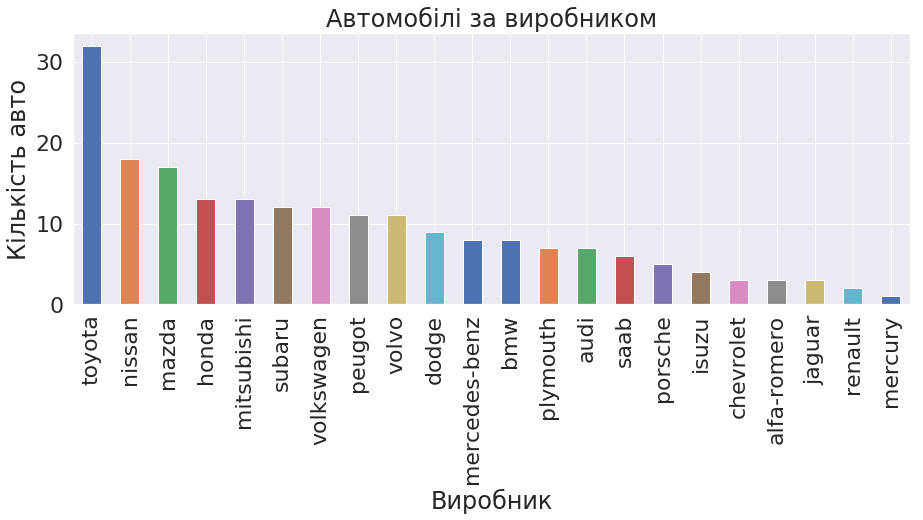

In [20]:
df['make'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Автомобілі за виробником')
plt.xlabel('Виробник')
plt.ylabel('Кількість авто')
plt.show()

### Співвідношення по типу палива

Text(0, 0.5, 'Кількість машин')

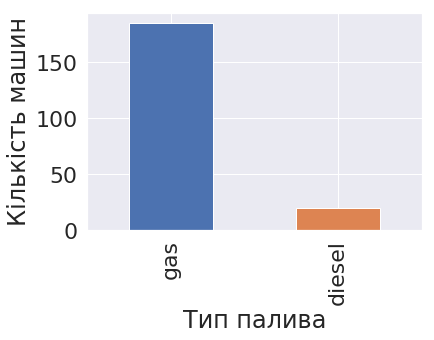

In [21]:
df['fuel-type'].value_counts().plot(kind='bar')
plt.xlabel('Тип палива')
plt.ylabel('Кількість машин')

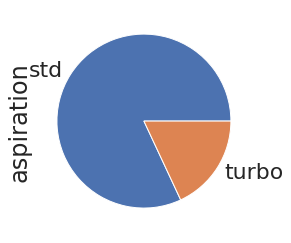

In [22]:
df['aspiration'].value_counts().plot.pie()

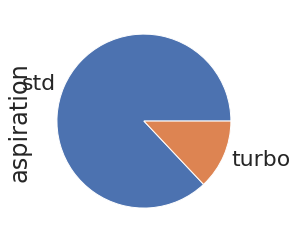

In [23]:
df[df['fuel-type'] == 'gas']['aspiration'].value_counts().plot.pie()

## Співвідношення по спорядженій масі та типу кузова

Text(0, 0.5, 'Кількість машин')

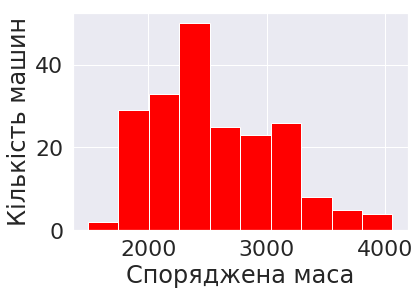

In [24]:
df['curb-weight'].hist(bins=10, color='red')
plt.xlabel('Споряджена маса')
plt.ylabel('Кількість машин')

Text(0, 0.5, 'Кількість машин')

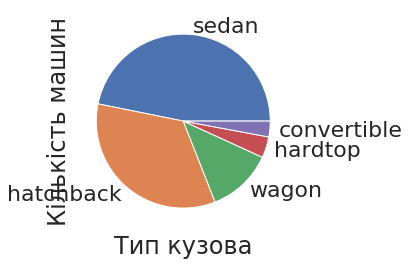

In [25]:
df['body-style'].value_counts().plot.pie()
plt.xlabel('Тип кузова')
plt.ylabel('Кількість машин')

### Гістограма по ціні автомобілів

Text(0, 0.5, 'Кількість машин')

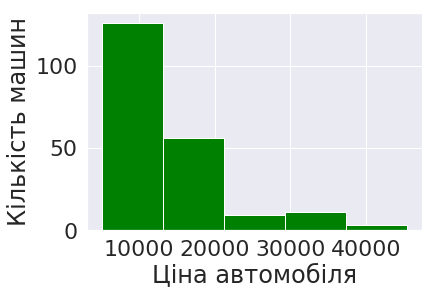

In [26]:
df_copy['price'].hist(bins=5, color='green')
plt.xlabel('Ціна автомобіля')
plt.ylabel('Кількість машин')

### Позначення ризику
У нашій таблиці відсутні записи про найбезпечніший тип автомобілів, з позначенням ступеня ризику -3. Натомість ми бачимо, що більшість авто має ступінь від 0 до 3, тобто є менш безпечними.

Text(0, 0.5, 'Кількість машин')

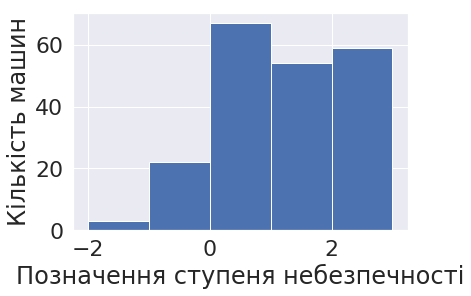

In [27]:
df.symboling.hist(bins=5)
plt.xlabel('Позначення ступеня небезпечності')
plt.ylabel('Кількість машин')

### Порівняємо показники автомобілів, позначених як найбільш безпечними з найбільш небезпечними в таблиці.

In [28]:
df[df['symboling'] == -2]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm
194,-2,103,volvo,gas,std,four,sedan,rwd,front,56.200001,2912,ohc,four,mpfi,3.78,3.15,9.5,5400
196,-2,103,volvo,gas,std,four,sedan,rwd,front,56.200001,2935,ohc,four,mpfi,3.78,3.15,9.5,5400
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,56.200001,3045,ohc,four,mpfi,3.62,3.15,7.5,5100


In [29]:
df[df['symboling'] == 3].head(n=15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm
0,3,-1,alfa-romero,gas,std,two,convertible,rwd,front,48.799999,2548,dohc,four,mpfi,3.470000,2.680000,9.0,5000
1,3,-1,alfa-romero,gas,std,two,convertible,rwd,front,48.799999,2548,dohc,four,mpfi,3.470000,2.680000,9.0,5000
29,3,145,dodge,gas,turbo,two,hatchback,fwd,front,50.200001,2811,ohc,four,mfi,3.600000,3.900000,7.0,5000
55,3,150,mazda,gas,std,two,hatchback,rwd,front,49.599998,2380,rotor,two,4bbl,3.329752,3.255425,9.4,6000
56,3,150,mazda,gas,std,two,hatchback,rwd,front,49.599998,2380,rotor,two,4bbl,3.329752,3.255425,9.4,6000
57,3,150,mazda,gas,std,two,hatchback,rwd,front,49.599998,2385,rotor,two,4bbl,3.329752,3.255425,9.4,6000
58,3,150,mazda,gas,std,two,hatchback,rwd,front,49.599998,2500,rotor,two,mpfi,3.329752,3.255425,9.4,6000
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,50.799999,3685,ohcv,eight,mpfi,3.460000,3.100000,8.3,4750
80,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,49.400002,2370,ohc,four,spdi,3.170000,3.460000,7.5,5500
81,3,153,mitsubishi,gas,std,two,hatchback,fwd,front,49.400002,2328,ohc,four,2bbl,3.350000,3.460000,8.5,5000


### Гістограма за нормалізованими збитками

Text(0, 0.5, 'Кількість машин')

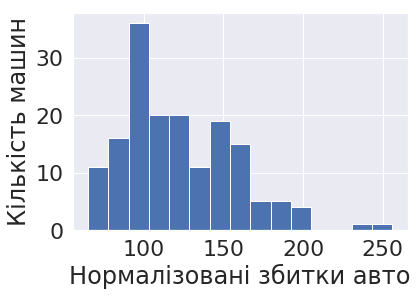

In [30]:
df[df['normalized-losses'] != -1]['normalized-losses'].hist(bins=15)
plt.xlabel('Нормалізовані збитки авто')
plt.ylabel('Кількість машин')

# 5. Висновки

### 1) Найбільшим виробником автомобілів із вказаної таблиці є Toyota. Разом з Nissan і Mazda вони займають ~30% всього ринку автомобілів.
### 2) Переважна більшість автомобілів заправляються газом та мають стандартну систему подачи палива.
### 3) Автомобілі на дизелі частіше мають встановлену систему турбонадуву, ніж на газу.
### 4) Майже половина всіх авто є Седанами. А найчастіше автомобілі зустрічаються зі спорядженною масою від 2000 до 2500 кг.
### 5) Більшість авто входять в недорогу цінову категорію: від 5000 до 1300 доларів за машину.
### 6) Якщо порівняти список авто з індексом небезпеки -2 (найменший, що є у таблиці) зі списком авто з індексом 3, то можна виокремити такі особливості:
#### 6.1 Всі безпечні автомобілі є чотирьохдверні.
#### 6.2 Безпечні автомобілі мають більшу за середню відстань між колісними осями.
#### 6.3 Всі безпечні авто є седанами із заднім приводом.
### 7) Авто із розрахованими нормалізованими збитками більше 160 в таблиці напрочуд мало.